# Explore the steering angle dataset

This notebook helps us explore the dataset and ensure that we understand it's size, any bias in it, etc.

* Imports

In [24]:
import os
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.misc
%matplotlib inline

* Load data

In [25]:
data_dir = '../data'
data_file = os.path.join(data_dir, 'data.txt')
columns = ['image_name', 'angle', 'date', 'time']
df = pd.read_csv(data_file, names=columns, delimiter=' ')
df['radians'] = df['angle'] * scipy.pi / 180

* Get basic statistics from dataset

In [26]:
print('Dataset analysis\n')
print('Number of samples = {}'.format(len(df)))
print('Max steering angle = {}'.format(max(df['angle'])))
print('Min steering angle = {}'.format(min(df['angle'])))
print('Number of samples with steering angle of 0 = {}'.format(len(df[df['angle'] == 0])))
print('Mean value of steering angles = {}'.format(np.mean(df['angle'])))
print('Mean value of abs steering angles = {}'.format(np.mean(abs(df['angle']))))
print('Median steering angle = {}'.format(np.median(df['angle'])))
print('Standard deviation of steering angle = {}'.format(np.std(df['angle'])))

Dataset analysis

Number of samples = 63825
Max steering angle = 252.61000099999998
Min steering angle = -338.820007
Number of samples with steering angle of 0 = 2491
Mean value of steering angles = 1.2565407032667448
Mean value of abs steering angles = 12.839079826776343
Median steering angle = 1.51
Standard deviation of steering angle = 26.604885369655562


* Graph distribution of steering angles

Text(0, 0.5, 'Number of samples')

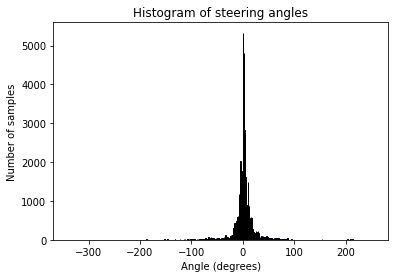

In [27]:
plt.hist(df['angle'], color = 'blue', edgecolor = 'black',
         bins = int((360*2)))
plt.title('Histogram of steering angles')
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

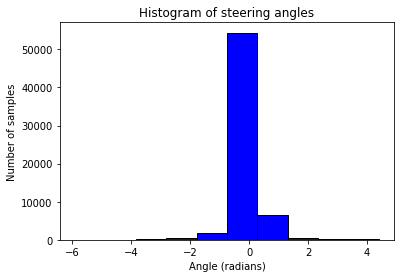

In [28]:
plt.hist(df['radians'], color = 'blue', edgecolor = 'black',
         bins = int((10)))
plt.title('Histogram of steering angles')
plt.xlabel('Angle (radians)')
plt.ylabel('Number of samples')

In [29]:
prev_pc = 0 
for angle in range(25):
    pc = (len(df[(df['angle'] <= angle) & (df['angle'] >= -angle)]) / len(df) * 100) - prev_pc
    print('Percentage of samples between -{} and +{} degrees = {}%'.format(angle, angle, round(pc,2)))
    prev_pc += pc

Percentage of samples between -0 and +0 degrees = 3.9%
Percentage of samples between -1 and +1 degrees = 10.43%
Percentage of samples between -2 and +2 degrees = 11.17%
Percentage of samples between -3 and +3 degrees = 8.45%
Percentage of samples between -4 and +4 degrees = 6.72%
Percentage of samples between -5 and +5 degrees = 8.21%
Percentage of samples between -6 and +6 degrees = 4.93%
Percentage of samples between -7 and +7 degrees = 2.97%
Percentage of samples between -8 and +8 degrees = 3.64%
Percentage of samples between -9 and +9 degrees = 2.73%
Percentage of samples between -10 and +10 degrees = 4.03%
Percentage of samples between -11 and +11 degrees = 2.41%
Percentage of samples between -12 and +12 degrees = 2.72%
Percentage of samples between -13 and +13 degrees = 2.15%
Percentage of samples between -14 and +14 degrees = 1.7%
Percentage of samples between -15 and +15 degrees = 1.78%
Percentage of samples between -16 and +16 degrees = 1.94%
Percentage of samples between -17 

* Graph this subset of data

Text(0, 0.5, 'Number of samples')

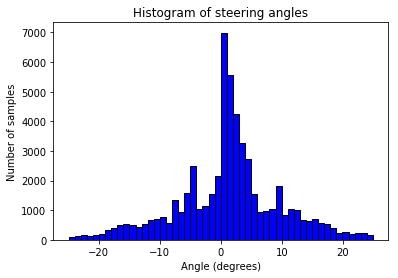

In [30]:
angle = 25
plt.hist(df[(df['angle'] <= angle) & (df['angle'] >= -angle)]['angle'], 
         color = 'blue', edgecolor = 'black',
         bins = int((angle*2)))
plt.title('Histogram of steering angles')
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of samples')

* Resample the data to minimise the bias around 0 degrees

In [46]:
from random import random
df_resampled = pd.DataFrame(columns=columns)
for i, row in df.iterrows():
    r = random()
    if r > 0.25 and abs(row['angle']) < 5:
        continue
    df_resampled = df_resampled.append(row)

In [47]:
df_resampled.shape

(40456, 5)

Text(0, 0.5, 'Number of samples')

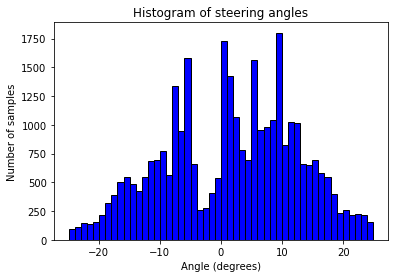

In [48]:
angle = 25
plt.hist(df_resampled[(df_resampled['angle'] <= angle) & (df_resampled['angle'] >= -angle)]['angle'], 
         color = 'blue', edgecolor = 'black',
         bins = int((angle*2)))
plt.title('Histogram of steering angles')
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of samples')

In [51]:
df_resampled.to_csv('../data/resampled.csv', sep=' ', index=False)

* Absolute steering values

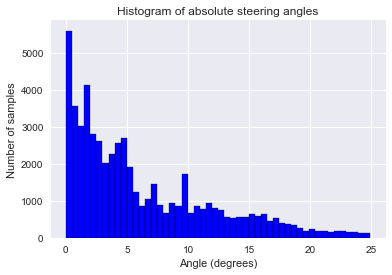

In [93]:
angle = 25
plt.hist(abs(df[(df['angle'] <= angle) & (df['angle'] >= -angle)]['angle']), 
         color = 'blue', edgecolor = 'black',
         bins = int((angle*2)))
plt.title('Histogram of absolute steering angles')
plt.xlabel('Angle (degrees)')
plt.ylabel('Number of samples')

### Preview the data

In [97]:
cv2.startWindowThread()
num_frames = len(df)
for i, sample in df.iterrows():
    file = os.path.join(data_dir, 'data', sample['image_name'])
    image = cv2.imread(file)
    timestamp = '{}/{} : Frame {}/{}'.format(sample['date'], sample['time'], i, num_frames)
    angle = 'Angle: {}'.format(round(sample['angle'], 1))
    cv2.putText(image, timestamp, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0),1 ,cv2.LINE_AA)
    cv2.putText(image, angle, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0),1 ,cv2.LINE_AA)
    cv2.imshow('Steering Angle',image)
    k = cv2.waitKey(5) & 0xFF
    # bailout on 'esc'
    if k == 27:
        break
        
cv2.destroyAllWindows()
cv2.waitKey(1)

-1